# ImplementK-NearestNeighbor(KNN)


Read the content from the file.

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import csv
import operator

#function used to get the content from text file.
def getdata(filename):
    with open(filename) as f:
        reader = csv.reader(f)
        return list(reader)

random shuffling the data and Dividing the data to training and testing datasets

In [170]:
#random train test data split function definition
def shuffle(data):
    np.random.seed(2)
    np.random.shuffle(data)
    train_data = data[:int(0.7*len(data))]
    test_data = data[int(0.7*len(data)):]
    return train_data, test_data

In [171]:
#random train test data split function definition
def shuffle1(data):
    np.random.seed(1)
    np.random.shuffle(data)
    train_data = data[:int(0.7*len(data))]
    test_data = data[int(0.7*len(data)):]
    return train_data, test_data

Function to calculate the euclidean distance

In [172]:
def euclideanDist(x, y):
    d = 0.0
    for i in range(len(x)-1):
        d += pow((float(x[i])-float(y[i])),2)  #euclidean distance
    d = np.sqrt(d)
    return d

Function for finding the nearest neighbour and then predicting the classifier sets based on the value of votings.

In [173]:
#KNN prediction and model training
def knn_predict(test_data, train_data, k_value):
    for i in test_data:
        eu_Distance =[]
        knn = []
        #votes
        setosa = 0
        virginica = 0
        versicolor = 0
        for j in train_data:
            eu_dist = euclideanDist(i, j)
            eu_Distance.append((j[4], eu_dist))
            eu_Distance.sort(key = operator.itemgetter(1))
            knn = eu_Distance[:k_value]
            #print(knn)
            for k in knn:
                if k[0] =='Iris-setosa':
                    setosa += 1
                elif k[0] =='Iris-virginica':
                    virginica +=1
                else:
                    versicolor +=1
       
        if setosa > virginica & setosa > versicolor :
            i.append('Iris-setosa')
        elif virginica > setosa & virginica > versicolor :
            i.append('Iris-virginica')
        else:
            i.append('Iris-versicolor')

Defining the function to find accuracy. if the prediction is similar to the iris class then we increment the value and the final divide the total correct values with the size of test data to get the accuracy rate. This function is used to calculate the quality of predicted values.

In [174]:
def accuracy(test_data):
    correct = 0
    for i in test_data:
        if i[4] == i[5]:
            correct += 1
    accuracy = float(correct)/len(test_data)  #accuracy 
    return accuracy

loading the dta from text file and passing the data to defined function to find the accuracy. I have chosen the neighbour value as 10 and found the accuracy to be 0.733.

In [175]:
dataset = getdata('C:\Users\saikiran\Desktop\iris.txt')  
train_dataset, test_dataset = shuffle(dataset) #train test data split
K = 10                                         # Assumed K value
knn_predict(test_dataset, train_dataset, K)   
print (test_dataset)
print "Accuracy : ",accuracy(test_dataset)

[['5.1', '3.4', '1.5', '0.2', 'Iris-setosa', 'Iris-setosa'], ['5.0', '3.3', '1.4', '0.2', 'Iris-setosa', 'Iris-setosa'], ['5.7', '2.6', '3.5', '1.0', 'Iris-versicolor', 'Iris-versicolor'], ['6.9', '3.1', '5.4', '2.1', 'Iris-virginica', 'Iris-versicolor'], ['5.5', '2.6', '4.4', '1.2', 'Iris-versicolor', 'Iris-versicolor'], ['6.3', '2.8', '5.1', '1.5', 'Iris-virginica', 'Iris-versicolor'], ['7.0', '3.2', '4.7', '1.4', 'Iris-versicolor', 'Iris-versicolor'], ['6.8', '2.8', '4.8', '1.4', 'Iris-versicolor', 'Iris-versicolor'], ['6.5', '3.2', '5.1', '2.0', 'Iris-virginica', 'Iris-versicolor'], ['6.9', '3.1', '4.9', '1.5', 'Iris-versicolor', 'Iris-versicolor'], ['5.5', '2.4', '3.8', '1.1', 'Iris-versicolor', 'Iris-versicolor'], ['5.6', '3.0', '4.5', '1.5', 'Iris-versicolor', 'Iris-versicolor'], ['6.0', '3.0', '4.8', '1.8', 'Iris-virginica', 'Iris-versicolor'], ['6.0', '2.7', '5.1', '1.6', 'Iris-versicolor', 'Iris-versicolor'], ['5.8', '2.7', '5.1', '1.9', 'Iris-virginica', 'Iris-versicolor'], 

# Exercise-2


Checking for optimal value of K.To check the optimal value i have shuffled my training data set to 70 % training and testing data and calculated the accuracy values for various K values as follows:

In [181]:
#when k = 6
dataset = getdata('C:\Users\saikiran\Desktop\iris.txt')  
train_dataset, test_dataset = shuffle(dataset) #train test data split
train_dataset1, test_dataset1 = shuffle1(train_dataset)
print(len(train_dataset1))
print(len(test_dataset1))
K =6    # Assumed K value

knn_predict(test_dataset1, train_dataset1, K) 
print (test_dataset1)
print "Accuracy : ",accuracy(test_dataset1)

73
32
[['7.2', '3.6', '6.1', '2.5', 'Iris-virginica', 'Iris-versicolor'], ['7.6', '3.0', '6.6', '2.1', 'Iris-virginica', 'Iris-versicolor'], ['6.4', '3.2', '5.3', '2.3', 'Iris-virginica', 'Iris-versicolor'], ['5.8', '2.7', '5.1', '1.9', 'Iris-virginica', 'Iris-versicolor'], ['5.2', '2.7', '3.9', '1.4', 'Iris-versicolor', 'Iris-versicolor'], ['6.7', '2.5', '5.8', '1.8', 'Iris-virginica', 'Iris-versicolor'], ['5.9', '3.0', '5.1', '1.8', 'Iris-virginica', 'Iris-versicolor'], ['5.4', '3.9', '1.7', '0.4', 'Iris-setosa', 'Iris-versicolor'], ['5.7', '2.8', '4.5', '1.3', 'Iris-versicolor', 'Iris-versicolor'], ['5.0', '3.4', '1.6', '0.4', 'Iris-setosa', 'Iris-versicolor'], ['6.0', '3.4', '4.5', '1.6', 'Iris-versicolor', 'Iris-versicolor'], ['7.2', '3.2', '6.0', '1.8', 'Iris-virginica', 'Iris-versicolor'], ['5.1', '3.8', '1.9', '0.4', 'Iris-setosa', 'Iris-versicolor'], ['4.4', '3.2', '1.3', '0.2', 'Iris-setosa', 'Iris-versicolor'], ['5.0', '2.0', '3.5', '1.0', 'Iris-versicolor', 'Iris-versicolor

In [182]:
# when k =44
dataset = getdata('C:\Users\saikiran\Desktop\iris.txt')  
train_dataset, test_dataset = shuffle(dataset) #train test data split
train_dataset1, test_dataset1 = shuffle1(train_dataset)
print(len(train_dataset1))
print(len(test_dataset1))
K = 44   # Assumed K value

knn_predict(test_dataset1, train_dataset1, K) 
print (test_dataset1)
print "Accuracy : ",accuracy(test_dataset1)

73
32
[['7.2', '3.6', '6.1', '2.5', 'Iris-virginica', 'Iris-versicolor'], ['7.6', '3.0', '6.6', '2.1', 'Iris-virginica', 'Iris-versicolor'], ['6.4', '3.2', '5.3', '2.3', 'Iris-virginica', 'Iris-versicolor'], ['5.8', '2.7', '5.1', '1.9', 'Iris-virginica', 'Iris-versicolor'], ['5.2', '2.7', '3.9', '1.4', 'Iris-versicolor', 'Iris-versicolor'], ['6.7', '2.5', '5.8', '1.8', 'Iris-virginica', 'Iris-versicolor'], ['5.9', '3.0', '5.1', '1.8', 'Iris-virginica', 'Iris-versicolor'], ['5.4', '3.9', '1.7', '0.4', 'Iris-setosa', 'Iris-setosa'], ['5.7', '2.8', '4.5', '1.3', 'Iris-versicolor', 'Iris-versicolor'], ['5.0', '3.4', '1.6', '0.4', 'Iris-setosa', 'Iris-setosa'], ['6.0', '3.4', '4.5', '1.6', 'Iris-versicolor', 'Iris-versicolor'], ['7.2', '3.2', '6.0', '1.8', 'Iris-virginica', 'Iris-versicolor'], ['5.1', '3.8', '1.9', '0.4', 'Iris-setosa', 'Iris-setosa'], ['4.4', '3.2', '1.3', '0.2', 'Iris-setosa', 'Iris-setosa'], ['5.0', '2.0', '3.5', '1.0', 'Iris-versicolor', 'Iris-virginica'], ['6.7', '3.3'

In [183]:
# when k = 8
dataset = getdata('C:\Users\saikiran\Desktop\iris.txt') 
train_dataset, test_dataset = shuffle(dataset) #train test data split
train_dataset1, test_dataset1 = shuffle1(train_dataset)
print(len(train_dataset1))
print(len(test_dataset1))
K = 8   # Assumed K value

knn_predict(test_dataset1, train_dataset1, K) 
print (test_dataset1)
print "Accuracy : ",accuracy(test_dataset1)

73
32
[['7.2', '3.6', '6.1', '2.5', 'Iris-virginica', 'Iris-versicolor'], ['7.6', '3.0', '6.6', '2.1', 'Iris-virginica', 'Iris-versicolor'], ['6.4', '3.2', '5.3', '2.3', 'Iris-virginica', 'Iris-versicolor'], ['5.8', '2.7', '5.1', '1.9', 'Iris-virginica', 'Iris-versicolor'], ['5.2', '2.7', '3.9', '1.4', 'Iris-versicolor', 'Iris-versicolor'], ['6.7', '2.5', '5.8', '1.8', 'Iris-virginica', 'Iris-versicolor'], ['5.9', '3.0', '5.1', '1.8', 'Iris-virginica', 'Iris-versicolor'], ['5.4', '3.9', '1.7', '0.4', 'Iris-setosa', 'Iris-setosa'], ['5.7', '2.8', '4.5', '1.3', 'Iris-versicolor', 'Iris-versicolor'], ['5.0', '3.4', '1.6', '0.4', 'Iris-setosa', 'Iris-setosa'], ['6.0', '3.4', '4.5', '1.6', 'Iris-versicolor', 'Iris-versicolor'], ['7.2', '3.2', '6.0', '1.8', 'Iris-virginica', 'Iris-versicolor'], ['5.1', '3.8', '1.9', '0.4', 'Iris-setosa', 'Iris-setosa'], ['4.4', '3.2', '1.3', '0.2', 'Iris-setosa', 'Iris-setosa'], ['5.0', '2.0', '3.5', '1.0', 'Iris-versicolor', 'Iris-versicolor'], ['6.7', '3.3

In [110]:
# when k = 20
dataset = getdata('C:\Users\saikiran\Desktop\iris.txt') 
train_dataset, test_dataset = shuffle(dataset) #train test data split
train_dataset1, test_dataset1 = shuffle1(train_dataset)
print(len(train_dataset1))
print(len(test_dataset1))
K = 20   # Assumed K value

knn_predict(test_dataset1, train_dataset1, K) 
print (test_dataset1)
print "Accuracy : ",accuracy(test_dataset1)

73
32
[['7.2', '3.6', '6.1', '2.5', 'Iris-virginica', 'Iris-versicolor'], ['7.6', '3.0', '6.6', '2.1', 'Iris-virginica', 'Iris-versicolor'], ['6.4', '3.2', '5.3', '2.3', 'Iris-virginica', 'Iris-versicolor'], ['5.8', '2.7', '5.1', '1.9', 'Iris-virginica', 'Iris-versicolor'], ['5.2', '2.7', '3.9', '1.4', 'Iris-versicolor', 'Iris-versicolor'], ['6.7', '2.5', '5.8', '1.8', 'Iris-virginica', 'Iris-setosa'], ['5.9', '3.0', '5.1', '1.8', 'Iris-virginica', 'Iris-versicolor'], ['5.4', '3.9', '1.7', '0.4', 'Iris-setosa', 'Iris-setosa'], ['5.7', '2.8', '4.5', '1.3', 'Iris-versicolor', 'Iris-versicolor'], ['5.0', '3.4', '1.6', '0.4', 'Iris-setosa', 'Iris-setosa'], ['6.0', '3.4', '4.5', '1.6', 'Iris-versicolor', 'Iris-versicolor'], ['7.2', '3.2', '6.0', '1.8', 'Iris-virginica', 'Iris-versicolor'], ['5.1', '3.8', '1.9', '0.4', 'Iris-setosa', 'Iris-setosa'], ['4.4', '3.2', '1.3', '0.2', 'Iris-setosa', 'Iris-setosa'], ['5.0', '2.0', '3.5', '1.0', 'Iris-versicolor', 'Iris-versicolor'], ['6.7', '3.3', '

<b>These are the accuracy rates for different values of k. and max accuracy i was able to get doing this approach is 0.71 for k =20. which is less than the K value i have chosen to train the whole model where my accuracy was 0.7333.</b>


 Experimentally,give evidence that your chosen value is better than other values of K.[Hint: runyour experiment with different values of K and plot the error measure for each value].

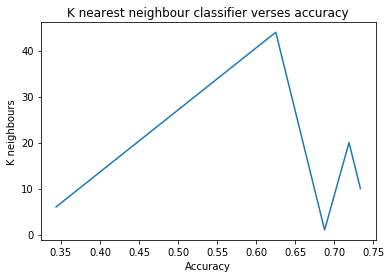

In [184]:
# these are accuracy values  for various k i have passed to the model my optimal value of k is 10 where accuracy is 0.7333
plt.plot([0.34375,0.625,0.6875,0.71875,0.73333],[6,44,1,20,10])
plt.title("K nearest neighbour classifier verses accuracy")
#Label the X and Y axes
plt.xlabel("Accuracy")
plt.ylabel("K neighbours")
plt.show()

<h2><b> Exercise 2b) using scikit </b></h2>


<h2><b> Comparing KNN method and Tree based for iris dataset</b></h2>

In [112]:
#loading iris data using pandas.
iris = pd.read_csv('C:\Users\saikiran\Desktop\iris.txt', header = None)
X = np.array(iris.iloc[:, 0:4]) 
Y = np.array(iris.iloc[:, 4:])
print(X.shape)
print(Y.shape)
#dividing the data to training and testing datasets
np.random.seed(0)
msk = np.random.rand(len(X)) < 0.7
train_data = X[msk]
test_data = X[~msk]
Y_train = Y[msk].ravel()
Y_test = Y[~msk].ravel()
print(train_data.shape)
print(test_data.shape)
print(Y_train.shape)
print(Y_test.shape)
 

(150L, 4L)
(150L, 1L)
(111L, 4L)
(39L, 4L)
(111L,)
(39L,)


KNeighborsClassifier for training iris dataset using scikit and i have got the same accuracy score using  Nearest Neighbor and Decision Tree.

In [185]:
# for K nearest neighbour
knn = KNeighborsClassifier(n_neighbors=7)#k value is 7
# k nearest neighbour using Kd tree algorithm"
kdd = KNeighborsClassifier(n_neighbors=7, algorithm='kd_tree').fit(train_data,Y_train)
#kdd.fit(train_data, Y_train)
prediction_tree = kdd.predict(test_data)
print "using kd_tree , accuracy score is:", accuracy_score(Y_test, prediction_tree)
knn.fit(train_data, Y_train)
prediction = knn.predict(test_data)
print "using knn classfier, accuracy score is:",accuracy_score(Y_test, prediction)



using kd_tree , accuracy score is: 0.974358974359
using knn classfier, accuracy score is: 0.974358974359


performing a grid search and cross validation for the iris data sets to find the optimal value of k

In [186]:
parameter_knn = {'n_neighbors':[1,5,7,8,9]}
parameter_kdd = {'n_neighbors':[1,5,7,8,9],'algorithm':['kd_tree']}
knn = KNeighborsClassifier()
kdd =  KNeighborsClassifier()
clf = GridSearchCV(knn, parameter_knn, cv = 3)
clf_kdd = GridSearchCV(kdd, parameter_kdd, cv = 3)
clf.fit(train_data,Y_train)
clf_kdd.fit(train_data,Y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 5, 7, 8, 9], 'algorithm': ['kd_tree']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

The optimal value of k after cross validation using k nearest neighbour and kd_tree algorithm are 5. I have calculated the mean test scores of each k value and plotted that against their accuracy score respectively.

In [135]:
best_k = clf.best_estimator_.n_neighbors
print "best k value using K neighbour is:", best_k
best_kdd = clf_kdd.best_estimator_.n_neighbors
print "best k value using Kdd tree neighbour is:",best_kdd

best k value using K neighbour is: 5
best k value using Kdd tree neighbour is: 5


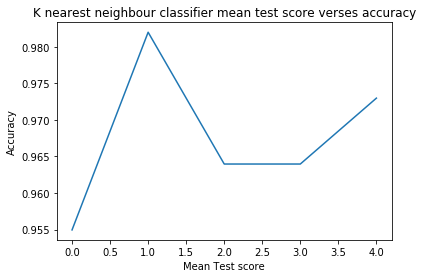

In [141]:
best_knn = clf.cv_results_['mean_test_score']
plt.plot(best_knn)
plt.title("K nearest neighbour classifier mean test score verses accuracy")
#Label the X and Y axes
plt.xlabel("Mean Test score")
plt.ylabel("Accuracy")
plt.show()

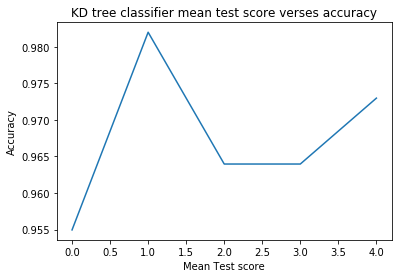

In [140]:
best_kdd = clf_kdd.cv_results_['mean_test_score']
plt.plot(best_kdd)
plt.title("KD tree classifier mean test score verses accuracy")
#Label the X and Y axes
plt.xlabel("Mean Test score")
plt.ylabel("Accuracy")
plt.show()

<h2> <b> Comparing KNN method and Tree based for Wine dataset</b></h2>

In [153]:
winered = pd.read_table("C:\Users\saikiran\Downloads\winequality-red.csv", delimiter=";") 
winewhite = pd.read_csv("C:\Users\saikiran\Downloads\winequality-white.csv", delimiter=";")
wine =  winered.add(winewhite, fill_value=0)
Xwine = np.array(wine.iloc[:, :11])
Ywine = np.array(wine.iloc[:, -1:])
print(Xwine.shape)
print(Ywine.shape)
np.random.seed(0)
msk = np.random.rand(len(Xwine)) < 0.7
train_data_wine = Xwine[msk]
test_data_wine = Xwine[~msk]
Y_train_wine = Ywine[msk].ravel()
Y_test_wine =Ywine[~msk].ravel()
print(train_data_wine.shape)
print(test_data_wine.shape)
print(Y_train_wine.shape)
print(Y_test_wine.shape)

(4898L, 11L)
(4898L, 1L)
(3442L, 11L)
(1456L, 11L)
(3442L,)
(1456L,)


KNeighborsClassifier for training wine dataset using scikit and i have got the same accuracy score using  Nearest Neighbor and Decision Tree.

In [187]:
# for K nearest neighbour
knn_wine = KNeighborsClassifier(n_neighbors=7)#k value is 7
# k nearest neighbour using Kd tree algorithm"
kdd_wine = KNeighborsClassifier(n_neighbors=7, algorithm='kd_tree').fit(train_data_wine,Y_train_wine)

prediction_tree_wine = kdd_wine.predict(test_data_wine)
print "using kd_tree, accuracy is:", accuracy_score(Y_test_wine, prediction_tree_wine)
knn_wine.fit(train_data_wine, Y_train_wine)
prediction_wine = knn_wine.predict(test_data_wine)
print "using knn classfier, accuracy is:",accuracy_score(Y_test_wine, prediction_wine)



using kd_tree, accuracy is: 0.39010989011
using knn classfier, accuracy is: 0.39010989011


performing a grid search  and cross validation for the wine data sets to find the optimal value of k

In [177]:
parameter_knn_wine = {'n_neighbors':[1,5,7,8,9]}
parameter_kdd_wine = {'n_neighbors':[1,5,7,8,9],'algorithm':['kd_tree']}
knn_wine = KNeighborsClassifier()
kdd_wine =  KNeighborsClassifier()
clf = GridSearchCV(knn_wine, parameter_knn_wine, cv = 30)
clf_kdd = GridSearchCV(kdd_wine, parameter_kdd_wine, cv = 30)
clf.fit(train_data_wine,Y_train_wine)
clf_kdd.fit(train_data_wine,Y_train_wine)

GridSearchCV(cv=30, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 5, 7, 8, 9], 'algorithm': ['kd_tree']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

The optimal value of k after cross validation using k nearest neighbour and kd_tree algorithm are 8. I have calculated the mean test scores of each k value and plotted that against their accuracy score respectively.

In [160]:
best_k_wine = clf.best_estimator_.n_neighbors
print "best k value using K neighbour is:", best_k_wine
best_kdd_wine = clf_kdd.best_estimator_.n_neighbors
print "best k value using Kdd tree neighbour is:",best_kdd_wine

best k value using K neighbour is: 8
best k value using Kdd tree neighbour is: 8


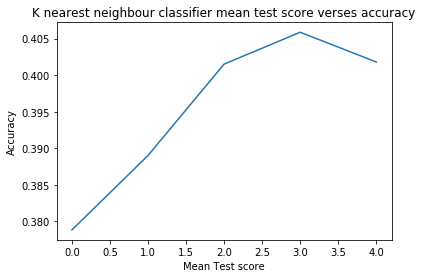

In [161]:
best_knn = clf.cv_results_['mean_test_score']
plt.plot(best_knn)
plt.title("K nearest neighbour classifier mean test score verses accuracy")
#Label the X and Y axes
plt.xlabel("Mean Test score")
plt.ylabel("Accuracy")
plt.show()

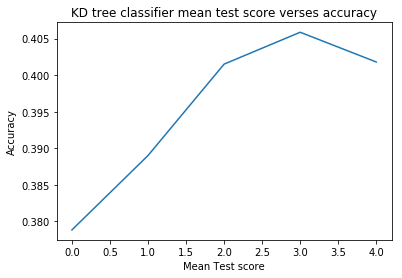

In [162]:
best_kdd = clf_kdd.cv_results_['mean_test_score']
plt.plot(best_kdd)
plt.title("KD tree classifier mean test score verses accuracy")
#Label the X and Y axes
plt.xlabel("Mean Test score")
plt.ylabel("Accuracy")
plt.show()

<h4> <b><i> My both Kd tree and K nearest neighbour algorithms are performing equally for both the datasets.</i></b></h4> 